In [380]:
# you 1st need to right click on the shared folder and select 'Add to my Drive'
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [381]:
#paths to Datasets 
dhs_survey_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/dhs_survey/NGPR7ADT/NGPR7AFL.DTA'
dhs_survey_dict_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/dhs_survey/NGPR7ADT/NGPR7AFL.DO'
lga_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/nigeria-lgas/new_lga_nigeria_2003.shp'
dhs_gps_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/NG_2018_DHS_07172021_114_165261_gps/NGGE7BFL/NGGE7BFL.shp'
fb_sett_img_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/hrsl_nga_v1_fb_settlement/hrsl_nga_settlement.tif'
fb_pop_img_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/hrsl_nga_v1_fb_settlement/hrsl_nga_pop.tif'

In [382]:
'''!pip install -q geopandas
import os
import glob

import numpy as np
import pandas as pd
'''

'!pip install -q geopandas\nimport os\nimport glob\n\nimport numpy as np\nimport pandas as pd\n'

In [383]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [384]:

def get_dhs_dict(dhs_dict_file):
  dhs_dict = dict()
  with open(dhs_dict_file, 'r', errors='replace') as file:
    line = file.readline()
    while line:
      line = file.readline()
      if 'label variable' in line:
        code = line.split()[2]
        colname = ' '.join([x.strip('"') for x in line.split()[3:]])
        dhs_dict[code] = colname
  return dhs_dict

In [385]:
dhs_survey_data =pd.read_stata(dhs_survey_path,convert_categoricals=False)
print('Data Dimensions: {}'.format(dhs_survey_data.shape))

Data Dimensions: (188010, 357)


In [386]:
#convert values to actual string values from dictioanry files hv022-hv026
dhs_survey_data.shstate.value_counts()

100    9688
30     7421
90     7167
40     6992
110    6842
50     6763
80     6684
120    6007
130    5925
20     5919
60     5897
360    5787
170    5725
10     5530
280    5329
180    4936
260    4931
150    4891
160    4820
70     4755
140    4731
320    4720
330    4274
200    4176
210    4153
310    4126
270    4099
300    4031
240    3797
340    3791
350    3696
190    3592
220    3539
370    3416
230    3386
250    3315
290    3159
Name: shstate, dtype: int64

In [387]:

dhs_survey_data.columns

Index(['hhid', 'hvidx', 'hv000', 'hv001', 'hv002', 'hv003', 'hv004', 'hv005',
       'hv006', 'hv007',
       ...
       'idxdis', 'hdis1', 'hdis2', 'hdis3', 'hdis4', 'hdis5', 'hdis6', 'hdis7',
       'hdis8', 'hdis9'],
      dtype='object', length=357)

In [388]:
#changing the names of columns
dhs_survey_dict=get_dhs_dict(dhs_survey_dict_path)
dhs_survey_data.columns = dhs_survey_data.columns.map(dhs_survey_dict)
#dhs_survey_data = dhs_survey_data.rename(columns=dhs_survey_dict)

In [389]:
dhs_survey_dict

{'chl0': 'NA - Number of de-jure children 5-14 for child labor module',
 'ha0': 'Index to Household Schedule',
 'ha1': "Woman's age in years",
 'ha11': 'Weight/Height standard deviation (DHS)',
 'ha12': 'Weight/Height percent ref. median (DHS)',
 'ha12a': 'Weight/Height percent ref. median (Fog)',
 'ha12b': 'Weight/Height percent ref. median (WHO)',
 'ha13': 'Result of measurement - height/weight',
 'ha2': "Woman's weight in kilograms (1 decimal)",
 'ha21': 'Fieldworker measurer code',
 'ha3': "Woman's height in centimeters (1 decimal)",
 'ha32': 'Date of birth (CMC)',
 'ha33': 'Completeness of HA32 information',
 'ha35': 'Smoking (cigarettes in last 24 hours)',
 'ha4': 'Height/Age percentile',
 'ha40': 'Body Mass Index',
 'ha41': "Rohrer's index",
 'ha5': 'Height/Age standard deviation',
 'ha50': 'Under age 18',
 'ha51': 'Line number of parent/caretaker',
 'ha52': 'Read consent statement - hemoglobin',
 'ha53': 'Hemoglobin level (g/dl - 1 decimal)',
 'ha54': 'Currently pregnant',
 'ha

In [390]:
dhs_survey_data

,Case Identification,Line number,Country code and phase,Cluster number,Household number,Respondent's line number (answering Household questionnaire),Ultimate area unit,Household sample weight (6 decimals),Month of interview,Year of interview,Date of interview (CMC),Date of interview Century Day Code (CDC),Number of household members,Number of eligible women in household,Number of eligible men in household,Number of de jure members,Number of de facto members,Number of children 5 and under (de jure),Result of household interview,Day of interview,Number of visits,Interviewer identification,NA - Keyer identification,Ever-married sample,Primary sampling unit,Sample strata for sampling errors,Stratification used in sample design,Region,Type of place of residence,NA - Place of residence,Household selected for male interview,Household weight for male subsample (6 decimals),Field supervisor,NA - Field editor,NA - Office editor,Number of eligible children for height and weight,Cluster altitude in meters,Total adults measured,Household selected for hemoglobin,Household selected for Domestic Violence module,...,NA - Line number of person who slept in this net,"Obtained net from campaign, antenatal or immunization visit",Place where net was obtained,Shown Net,Reason not sleeping inside the net,Index to Household Schedule,Type of Mosquito Bed Net(s) person slept under last night,Net Designation Number (HMLIDX) for 1st net person slept under last night,Net Designation Number (HMLIDX) for 2nd net person slept under last night,Net Designation Number (HMLIDX) for 3rd net person slept under last night,Corrected age from Individual file,Age in months (for children),Flag for age from Individual file,Pregnancy status from Individual file,Person slept under an ever-treated net,Person slept under an LLIN net,Line number of parent/caretaker (for malaria testing),Read consent statement for malaria,Final result of malaria from blood smear test,NA - Presence of species: falciparum (Pf),NA - Presence of species: malariae (Pm),NA - Presence of species: ovale (Po),NA - Presence of species: vivax (Pv),NA - Presence of species: CS,NA - Presence of species: CS,NA - Presence of species: CS,Result of malaria measurement,Bar code for blood smear sample,Result of malaria rapid test,Fieldworker measurer code for malaria,Index to household schedule,Wear glasses or contact lenses,Have difficulty seeing,Wear a hearing aid,Have difficulty hearing,Have difficulty communicating using usual language,Have difficulty remembering or concentrating,Have difficulty walking or climbing steps,Have difficulty washing all over or dressing,Highest degree of difficulty for any of the impairments
0,1 1,1,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,1,2,1,702,NaN,0,1,1,1,1,1,NaN,0,0,701,NaN,NaN,0,100,0,0,0,...,NaN,2.0,NaN,1.0,NaN,1,1,2,NaN,NaN,82,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,1,1.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0
1,1 1,2,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,1,2,1,702,NaN,0,1,1,1,1,1,NaN,0,0,701,NaN,NaN,0,100,0,0,0,...,NaN,2.0,NaN,1.0,NaN,2,1,1,NaN,NaN,40,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1 1,3,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,1,2,1,702,NaN,0,1,1,1,1,1,NaN,0,0,701,NaN,NaN,0,100,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,NaN,18,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1 1,4,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,1,2,1,702,NaN,0,1,1,1,1,1,NaN,0,0,701,NaN,NaN,0,100,0,0,0,...,NaN,NaN,NaN,NaN,NaN,4,0,0,NaN,NaN,11,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1 1,5,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,1,2,1,702,NaN,0,1,1,1,1,1,NaN,0,0,701,NaN,NaN,0,100,0,0,0,...,NaN,2.0,NaN,1.0,NaN,5,1,1,NaN,NaN,1,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,

In [391]:
 #I manually extract the important columns needed for the analysis
 #and converted to list
 important_cols=list({'hhid': 'Case Identification',
'hv000': 'Country code and phase',
'hv002': 'Household number',
'hv004': 'Ultimate area unit',
 'hv023': 'Stratification used in sample design',
 'hv024': 'Region',
 'hv025': 'Type of place of residence',
 'hv040': 'Cluster altitude in meters',
'hv206': 'Has electricity',
 'hv208': 'Has television',
 'hv209': 'Has refrigerator',
'sh121m': 'Has electric iron',
'hv235': 'Location of source for water',
'hv243a': 'Has mobile telephone',
 'hv243e': 'Has a computer',
 'shstate': 'State',
 'sh121l': 'Has air conditioner',
'hv009': 'Number of household members'}.values())

In [392]:
#checking if converted values is a list
type(important_cols)

list

In [393]:
#creating a subset from the main dataset
dhs_analysis_data=dhs_survey_data[important_cols]

In [394]:
dhs_analysis_data.columns

Index(['Case Identification', 'Country code and phase', 'Household number',
       'Ultimate area unit', 'Stratification used in sample design', 'Region',
       'Type of place of residence', 'Cluster altitude in meters',
       'Has electricity', 'Has television', 'Has refrigerator',
       'Has electric iron', 'Location of source for water',
       'Has mobile telephone', 'Has a computer', 'State',
       'Has air conditioner', 'Number of household members'],
      dtype='object')

In [395]:
dhs_analysis_data['Has electricity']

0         1
1         1
2         1
3         1
4         1
         ..
188005    1
188006    1
188007    1
188008    1
188009    1
Name: Has electricity, Length: 188010, dtype: int8

In [396]:

# Has electricity or not?
dhs_analysis_data['Has electricity'].value_counts()

1    98962
0    89048
Name: Has electricity, dtype: int64

In [397]:
dhs_analysis_data['State'].value_counts()

100    9688
30     7421
90     7167
40     6992
110    6842
50     6763
80     6684
120    6007
130    5925
20     5919
60     5897
360    5787
170    5725
10     5530
280    5329
180    4936
260    4931
150    4891
160    4820
70     4755
140    4731
320    4720
330    4274
200    4176
210    4153
310    4126
270    4099
300    4031
240    3797
340    3791
350    3696
190    3592
220    3539
370    3416
230    3386
250    3315
290    3159
Name: State, dtype: int64

In [398]:
#convert state codes to state strings
state_dict={10:"Sokoto",
    20:"Zamfara",
    30:"Katsina",
    40:"Jigawa",
    50:"Yobe",
    60:"Borno",
    70:"Adamawa",
    80:"Gombe",
    90:"Bauchi",
   100:"Kano",
   110:"Kaduna",
   120:"Kebbi",
   130:"Niger",
   140:"FCT Abuja",
   150:"Nasarawa",
   160:"Plateau",
   170:"Taraba",
   180:"Benue",
   190:"Kogi",
   200:"Kwara",
   210:"Oyo",
   220:"Osun",
   230:"Ekiti",
   240:"Ondo",
   250:"Edo",
   260:"Anambra",
   270:"Enugu",
   280:"Ebonyi",
   290:"Cross River",
   300:"Akwa Ibom",
   310:"Abia",
   320:"Imo",
   330:"Rivers",
   340:"Bayelsa",
   350:"Delta",
   360:"Lagos",
   370:"Ogun"}

# Remap the values of the dataframe
dhs_analysis_data.replace({"State":  state_dict},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [399]:
dhs_analysis_data.State.value_counts()

Kano           9688
Katsina        7421
Bauchi         7167
Jigawa         6992
Kaduna         6842
Yobe           6763
Gombe          6684
Kebbi          6007
Niger          5925
Zamfara        5919
Borno          5897
Lagos          5787
Taraba         5725
Sokoto         5530
Ebonyi         5329
Benue          4936
Anambra        4931
Nasarawa       4891
Plateau        4820
Adamawa        4755
FCT Abuja      4731
Imo            4720
Rivers         4274
Kwara          4176
Oyo            4153
Abia           4126
Enugu          4099
Akwa Ibom      4031
Ondo           3797
Bayelsa        3791
Delta          3696
Kogi           3592
Osun           3539
Ogun           3416
Ekiti          3386
Edo            3315
Cross River    3159
Name: State, dtype: int64

In [400]:
#convert state codes to state strings
stratum_dict={1:"NC Benue Urban",
     2:"NC Benue Rural",
     3:"NC FCT Abuja Urban",
     4:"NC FCT Abuja Rural",
     5:"NC Kogi Urban",
     6:"NC Kogi Rural",
     7:"NC Kwara Urban",
     8:"NC Kwara Rural",
     9:"NC Nasarawa Urban",
    10:"NC Nasarawa Rural",
    11:"NC Niger Urban",
    12:"NC Niger Rural",
    13:"NC Plateau Urban",
    14:"NC Plateau Rural",
    15:"NE Adamawa Urban",
    16:"NE Adamawa Rural",
    17:"NE Bauchi Urban",
    18:"NE Bauchi Rural",
    19:"NE Borno Urban",
    20:"NE Borno Rural",
    21:"NE Gombe Urban",
    22:"NE Gombe Rural",
    23:"NE Taraba Urban",
    24:"NE Taraba Rural",
    25:"NE Yobe Urban",
    26:"NE Yobe Rural",
    27:"NW Jigawa Urban",
    28:"NW Jigawa Rural",
    29:"NW Kaduna Urban",
    30:"NW Kaduna Rural",
    31:"NW Kano Urban",
    32:"NW Kano Rural",
    33:"NW Katsina Urban",
    34:"NW Katsina Rural",
    35:"NW Kebbi Urban",
    36:"NW Kebbi Rural",
    37:"NW Sokoto Urban",
    38:"NW Sokoto Rural",
    39:"NW Zamfara Urban",
    40:"NW Zamfara Rural",
    41:"SE Abia Urban",
    42:"SE Abia Rural",
    43:"SE Anambra Urban",
    44:"SE Anambra Rural",
    45:"SE Ebonyi Urban",
    46:"SE Ebonyi Rural",
    47:"SE Enugu Urban",
    48:"SE Enugu Rural",
    49:"SE Imo Urban",
    50:"SE Imo Rural",
    51:"SS Akwa Ibom Urban",
    52:"SS Akwa Ibom Rural",
    53:"SS Bayelsa Urban",
    54:"SS Bayelsa Rural",
    55:"SS Cross River Urban",
    56:"SS Cross River Rural",
    57:"SS Delta Urban",
    58:"SS Delta Rural",
    59:"SS Edo Urban",
    60:"SS Edo Rural",
    61:"SS Rivers Urban",
    62:"SS Rivers Rural",
    63:"SW Ekiti Urban",
    64:"SW Ekiti Rural",
    65:"SW Lagos Urban",
    66:"SW Lagos Rural",
    67:"SW Ogun Urban",
    68:"SW Ogun Rural",
    69:"SW Ondo Urban",
    70:"SW Ondo Rural",
    71:"SW Osun Urban",
    72:"SW Osun Rural",
    73:"SW Oyo Urban",
    74:"SW Oyo Rural"}

# Remap the values of the dataframe
dhs_analysis_data.replace({'Stratification used in sample design':  stratum_dict},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [401]:
dhs_analysis_data['Stratification used in sample design'].value_counts()

NE Bauchi Rural         6063
NW Jigawa Rural         5954
NW Kano Rural           5720
NW Katsina Rural        5701
SW Lagos Urban          5457
                        ... 
SE Abia Urban            894
NC Benue Urban           571
SS Cross River Urban     552
SW Lagos Rural           327
SS Akwa Ibom Urban       300
Name: Stratification used in sample design, Length: 74, dtype: int64

In [402]:
region_dict={1:"North Central",
     2:"North East",
     3:"North West",
     4:"South East",
     5:"South South",
     6:"South West"}
dhs_analysis_data.replace({'Region':region_dict},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [403]:
 place_type_dict={1:"Urban",
  2:"Rural"}
dhs_analysis_data.replace({'Type of place of residence':place_type_dict},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [404]:
dhs_analysis_data['Number of household members'].value_counts()

5     25760
6     24384
4     23256
7     20048
3     16473
8     15344
9     10305
2      9556
10     8460
1      6273
11     6193
12     5400
13     4043
14     3108
15     2190
16     1760
17     1292
19      988
18      918
20      580
21      441
23      345
24      264
22      242
25      125
29       87
27       81
37       37
31       31
26       26
Name: Number of household members, dtype: int64

In [406]:
dhs_analysis_data.loc[dhs_analysis_data.State == 'FCT Abuja', 'State'] = 'Abuja'
dhs_analysis_data.loc[dhs_analysis_data.State == 'Nasarawa', 'State'] = 'Nassarawa'
dhs_analysis_data.State.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Kano           9688
Katsina        7421
Bauchi         7167
Jigawa         6992
Kaduna         6842
Yobe           6763
Gombe          6684
Kebbi          6007
Niger          5925
Zamfara        5919
Borno          5897
Lagos          5787
Taraba         5725
Sokoto         5530
Ebonyi         5329
Benue          4936
Anambra        4931
Nassarawa      4891
Plateau        4820
Adamawa        4755
Abuja          4731
Imo            4720
Rivers         4274
Kwara          4176
Oyo            4153
Abia           4126
Enugu          4099
Akwa Ibom      4031
Ondo           3797
Bayelsa        3791
Delta          3696
Kogi           3592
Osun           3539
Ogun           3416
Ekiti          3386
Edo            3315
Cross River    3159
Name: State, dtype: int64

In [407]:
# Samples per state
state=dhs_analysis_data.groupby('State')['Has electricity'].agg(['count', 'mean'])
state

,count,mean
State,,
Abia,4126,0.891178
Abuja,4731,0.727119
Adamawa,4755,0.365300
Akwa Ibom,4031,0.717688
Anambra,4931,0.836950
Bauchi,7167,0.350774
Bayelsa,3791,0.442100
Benue,4936,0.393639
Borno,5897,0.354248


In [408]:
type(state)

pandas.core.frame.DataFrame

In [409]:
# overwrite index (state names) to match nigeria-states
state.reset_index(inplace=True)
state.State = state.State.astype(str)
state.set_index('State', drop=True, inplace=True)
state.index =state.index.str.lower()
state

,count,mean
State,,
abia,4126,0.891178
abuja,4731,0.727119
adamawa,4755,0.365300
akwa ibom,4031,0.717688
anambra,4931,0.836950
bauchi,7167,0.350774
bayelsa,3791,0.442100
benue,4936,0.393639
borno,5897,0.354248


In [410]:
#!pip install -q geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
ng_lga = gpd.read_file(lga_path)
dhs_gps_data = gpd.read_file(dhs_gps_path)

In [411]:
ng_lga.head()

,STATE,LGA,AREA,PERIMETER,LONGITUDE,LATITUDE,FULL_NAME,geometry
0,Sokoto,Gada,1193.977,170.095,None,None,None,"POLYGON ((5.53632 13.88793, 5.53480 13.88488, ..."
1,Sokoto,Illela,1298.423,174.726,None,None,None,"POLYGON ((5.53632 13.88793, 5.54517 13.88419, ..."
2,Sokoto,Tangaza,2460.715,209.702,None,None,None,"POLYGON ((4.85548 13.76724, 4.86189 13.78085, ..."
3,Borno,Abadam,2430.515,288.957,None,None,None,"POLYGON ((12.83189 13.39871, 12.83397 13.40439..."
4,Lake,Lake chad,5225.912,497.039,None,None,None,"POLYGON ((13.48608 13.30821, 13.48296 13.31344..."


In [412]:
#convert state columns to lower case
ng_lga.STATE.apply(lambda s: s.lower()).sort_values().unique()

array(['abia', 'abuja', 'adamawa', 'akwa ibom', 'anambra', 'bauchi',
       'bayelsa', 'benue', 'borno', 'cross river', 'delta', 'ebonyi',
       'edo', 'ekiti', 'enugu', 'gombe', 'imo', 'jigawa', 'kaduna',
       'kano', 'katsina', 'kebbi', 'kogi', 'kwara', 'lagos', 'lake',
       'nassarawa', 'niger', 'ogun', 'ondo', 'osun', 'oyo', 'plateau',
       'rivers', 'sokoto', 'taraba', 'yobe', 'zamfara'], dtype=object)

In [413]:
state.index

Index(['abia', 'abuja', 'adamawa', 'akwa ibom', 'anambra', 'bauchi', 'bayelsa',
       'benue', 'borno', 'cross river', 'delta', 'ebonyi', 'edo', 'ekiti',
       'enugu', 'gombe', 'imo', 'jigawa', 'kaduna', 'kano', 'katsina', 'kebbi',
       'kogi', 'kwara', 'lagos', 'nassarawa', 'niger', 'ogun', 'ondo', 'osun',
       'oyo', 'plateau', 'rivers', 'sokoto', 'taraba', 'yobe', 'zamfara'],
      dtype='object', name='State')

In [414]:
[s for s in ng_lga.STATE.apply(lambda s: s.lower()).tolist() if s not in state.index]

['lake']

In [416]:
ng_lga['e_supply'] = ng_lga.STATE.apply(lambda s: s.lower()).map(state['mean']).fillna(0)
ng_lga.set_index('STATE', drop=True)['e_supply']

STATE
Sokoto       0.396383
Sokoto       0.396383
Sokoto       0.396383
Borno        0.354248
Lake         0.000000
               ...   
Delta        0.647727
Niger        0.526245
Yobe         0.268668
Zamfara      0.339584
Akwa Ibom    0.717688
Name: e_supply, Length: 775, dtype: float64

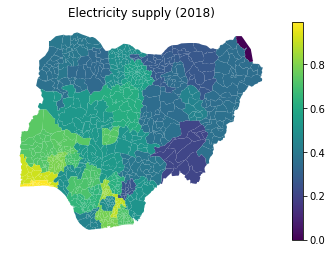

In [418]:
# high demand areas is in blue
states = ng_lga.groupby('STATE')
ax = ng_lga.plot(column='e_supply', legend=True)
ax.set_title('Electricity supply (2018)')
ax.set_axis_off()